# Data visualization in Python

Today we'll go over some basic examples for plotting datasets in different ways using [seaborn](https://seaborn.pydata.org/) and [matplotlib](https://matplotlib.org/), plotting libraries that work really well with [pandas](https://pandas.pydata.org/) dataframes.


In [1]:
# Load libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("paper", font_scale=2) # set some nice global plotting settings.

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Section 1: Visualizing the Star Wars dataset

In [2]:
df = pd.read_csv('data/starwars.tsv', sep='\t')

In [3]:
df.head()

,name,height,mass,hair_color,skin_color,eye_color,age,sex,gender,homeworld,species
0,Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,masculine,Tatooine,Human
1,C-3PO,167.0,75.0,NaN,gold,yellow,112.0,none,masculine,Tatooine,Droid
2,R2-D2,96.0,32.0,NaN,"white, blue",red,33.0,none,masculine,Naboo,Droid
3,Darth Vader,202.0,136.0,none,white,yellow,41.9,male,masculine,Tatooine,Human
4,Leia Organa,150.0,49.0,brown,light,brown,19.0,female,feminine,Alderaan,Human


In [4]:
df.tail()

,name,height,mass,hair_color,skin_color,eye_color,age,sex,gender,homeworld,species
81,Rey,NaN,NaN,brown,light,hazel,NaN,female,feminine,NaN,Human
82,Poe Dameron,NaN,NaN,brown,light,brown,NaN,male,masculine,NaN,Human
83,BB8,NaN,NaN,none,none,black,NaN,none,masculine,NaN,Droid
84,Captain Phasma,NaN,NaN,unknown,unknown,unknown,NaN,NaN,NaN,NaN,NaN
85,Padm<U+00E9> Amidala,165.0,45.0,brown,light,brown,46.0,female,feminine,Naboo,Human


Filter using the double equals sign (`==`) as a conditional operator (i.e. returns "True" and "False", not setting the 'species' column to be 'Wookiee', which would use a single `=`)


In [5]:
df[df['species'] == 'Wookiee']

,name,height,mass,hair_color,skin_color,eye_color,age,sex,gender,homeworld,species
12,Chewbacca,228.0,112.0,brown,unknown,blue,200.0,male,masculine,Kashyyyk,Wookiee
76,Tarfful,234.0,136.0,brown,brown,blue,NaN,male,masculine,Kashyyyk,Wookiee


Get breakdown of all values in a column using [`value_counts`](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html).

In [6]:
df['species'].value_counts()

species
Human             34
Droid              6
Gungan             3
Mirialan           2
Wookiee            2
Twi'lek            2
Kaminoan           2
Zabrak             2
Quermian           1
Kel Dor            1
Chagrian           1
Geonosian          1
Clawdite           1
Tholothian         1
Besalisk           1
Aleena             1
Skakoan            1
Muun               1
Togruta            1
Kaleesh            1
Iktotchi           1
Toong              1
Nautolan           1
Cerean             1
Xexto              1
Vulptereen         1
Dug                1
Toydarian          1
Neimodian          1
Sullustan          1
Ewok               1
Mon Calamari       1
Trandoshan         1
Yoda's species     1
Hutt               1
Rodian             1
Pau'an             1
Name: count, dtype: int64

What is the maximum height in each species? Using [`pandas.groupby`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [`max`](https://docs.python.org/3/library/functions.html) built-in function.



In [7]:
df.groupby('species')['height'].max()

species
Aleena             79.0
Besalisk          198.0
Cerean            198.0
Chagrian          196.0
Clawdite          168.0
Droid             200.0
Dug               112.0
Ewok               88.0
Geonosian         183.0
Gungan            224.0
Human             202.0
Hutt              175.0
Iktotchi          188.0
Kaleesh           216.0
Kaminoan          229.0
Kel Dor           188.0
Mirialan          170.0
Mon Calamari      180.0
Muun              191.0
Nautolan          196.0
Neimodian         191.0
Pau'an            206.0
Quermian          264.0
Rodian            173.0
Skakoan           193.0
Sullustan         160.0
Tholothian        184.0
Togruta           178.0
Toong             163.0
Toydarian         137.0
Trandoshan        190.0
Twi'lek           180.0
Vulptereen         94.0
Wookiee           234.0
Xexto             122.0
Yoda's species     66.0
Zabrak            175.0
Name: height, dtype: float64

## 1.1: Bar plots

How many characters per species?


In [8]:
species_counts = df['species'].value_counts()
species_counts.head()


species
Human       34
Droid        6
Gungan       3
Mirialan     2
Wookiee      2
Name: count, dtype: int64

In [9]:
species_counts = species_counts.reset_index() # moves the current index to its own column

In [10]:
species_counts.head()

,species,count
0,Human,34
1,Droid,6
2,Gungan,3
3,Mirialan,2
4,Wookiee,2


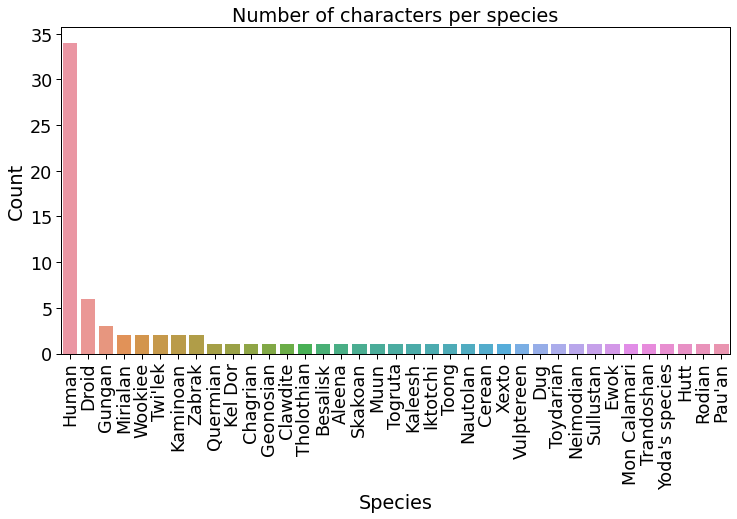

In [11]:
plt.figure(figsize=(12, 6))
sns.barplot(data=species_counts, x='species', y='count')
plt.title('Number of characters per species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


How many characters per homeworld? Try to recreate this plot:

pythonviz1.png

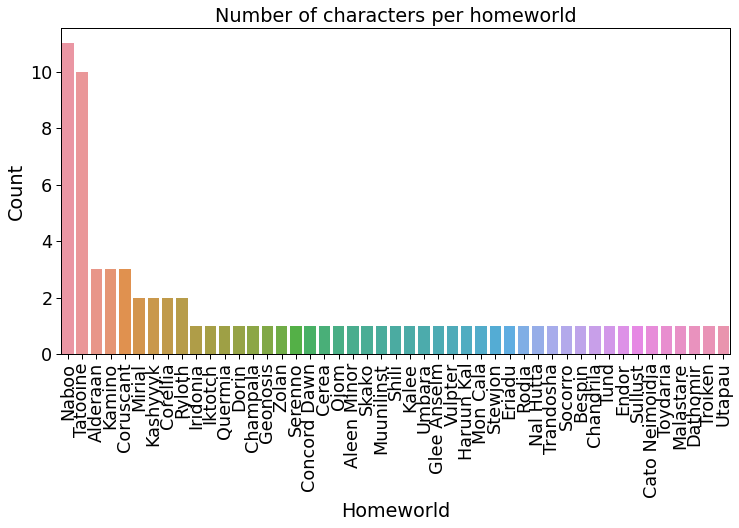

In [12]:
home_counts = df['homeworld'].value_counts().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=home_counts, x='homeworld', y='count')
plt.title('Number of characters per homeworld')
plt.xlabel('Homeworld')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


How many characters per sex? Using a custom color palette:

In [13]:
sex_counts = df['sex'].value_counts().reset_index()


In [14]:
# custom color palette
c_dict = {'male': '#8DA0CB', # purple
          'female': '#FFD92F', # yellow
          'hermaphroditic': '#A6D854', # green
          'none': '#66C2A5'} # teal

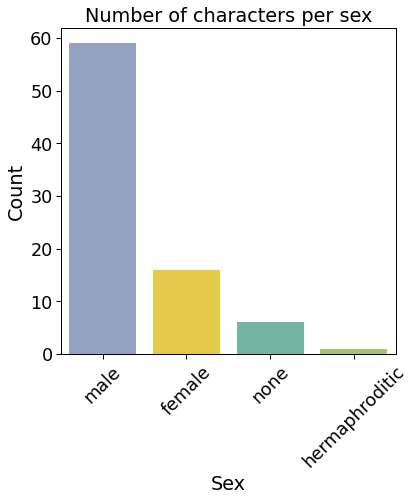

In [15]:
plt.figure(figsize=(6, 6)) 
sns.barplot(data=sex_counts, x='sex', y='count', palette=c_dict)  
plt.title('Number of characters per sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


How many human characters in each homeworld?


In [16]:
# Filter dataframe for human characters
df_human = df[df['species'] == 'Human']
home_counts = df_human['homeworld'].value_counts().reset_index()


In [17]:
len(home_counts)

14

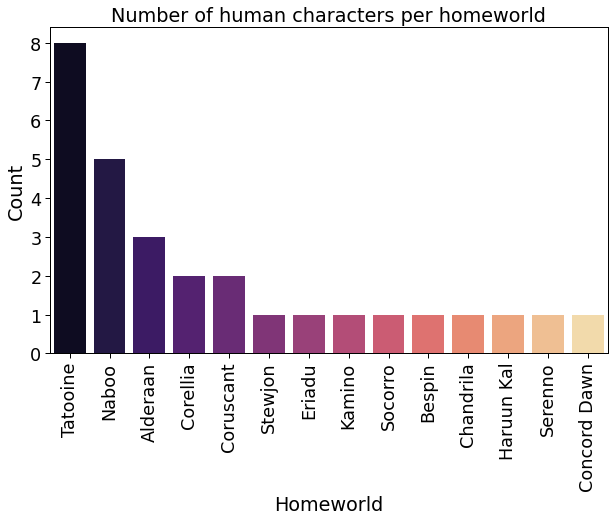

In [18]:
palette = sns.color_palette("magma", len(home_counts)) # generate custom color palette with 15 colors

plt.figure(figsize=(10, 6))
sns.barplot(data=home_counts, x='homeworld', y='count', palette=palette)
plt.title('Number of human characters per homeworld')
plt.xlabel('Homeworld')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


What is the average height across species? 

In [19]:
# Group by species and calculate mean height
species_height = df.groupby('species')['height'].mean().reset_index()
species_height.head()

,species,height
0,Aleena,79.0
1,Besalisk,198.0
2,Cerean,198.0
3,Chagrian,196.0
4,Clawdite,168.0


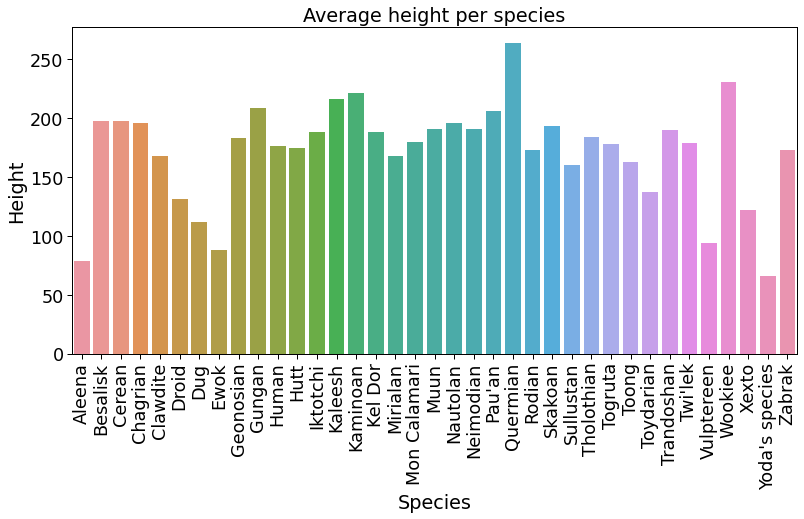

In [20]:
plt.figure(figsize=(13, 6))
sns.barplot(data=species_height, x='species', y='height')
plt.title('Average height per species')
plt.xlabel('Species')
plt.ylabel('Height')
plt.xticks(rotation=90)
plt.show()


Sorting df from shortest to tallest and plot

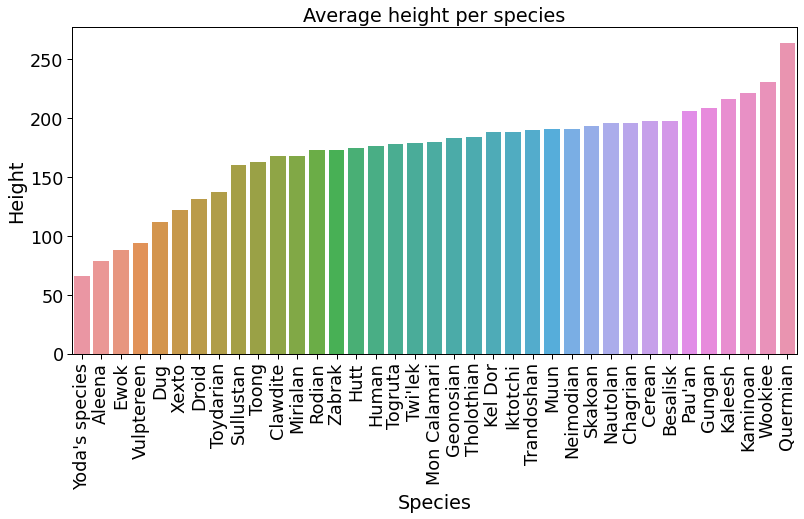

In [21]:
species_height_sorted = species_height.sort_values(by='height')

plt.figure(figsize=(13, 6))
sns.barplot(data=species_height_sorted, x='species', y='height')
plt.title('Average height per species')
plt.xlabel('Species')
plt.ylabel('Height')
plt.xticks(rotation=90)
plt.show()


What about for only some species? Using [isin](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.isin.html):

In [22]:
species_list = ['Human', 'Gungan', 'Mirialan', 'Wookiee',
                'Kaminoan', "Twi'lek", 'Droid']
species_height_filtered = species_height[species_height['species'].isin(species_list)].sort_values(by='height')


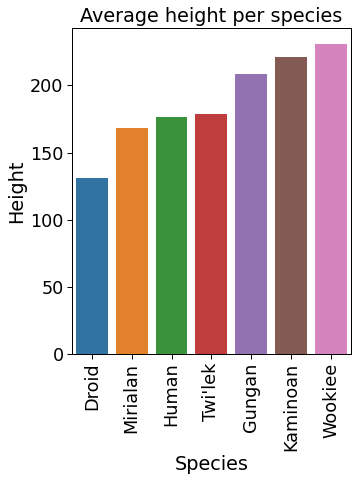

In [23]:
plt.figure(figsize=(5, 6))
sns.barplot(data=species_height_filtered, x='species', y='height')
plt.title('Average height per species')
plt.xlabel('Species')
plt.ylabel('Height')
plt.xticks(rotation=90)
plt.show()

What is the average age in humans by homeworld? Try to recreate this plot:

pythonviz2.png

Use the `viridis` color palette.

In [24]:
# Group by species and calculate mean height
age_homeworld = df[df['species'] == 'Human'].groupby('homeworld')['age'].mean().reset_index()
age_homeworld_sorted = age_homeworld.sort_values(by='age')


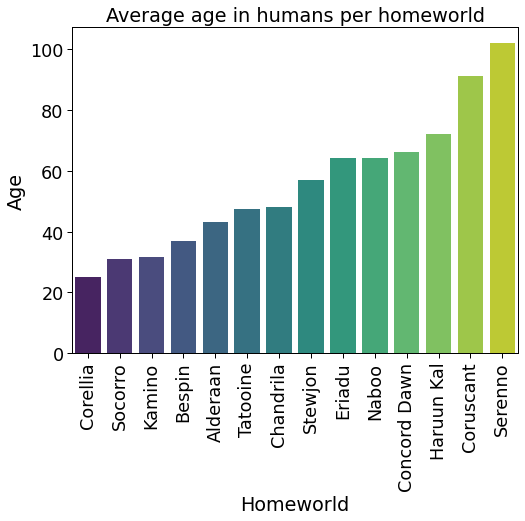

In [25]:
palette = sns.color_palette("viridis", len(age_homeworld_sorted))

plt.figure(figsize=(8, 6))
sns.barplot(data=age_homeworld_sorted, x='homeworld', y='age', palette=palette)
plt.title('Average age in humans per homeworld')
plt.xlabel('Homeworld')
plt.ylabel('Age')
plt.xticks(rotation=90)
plt.show()


## 1.2: Scatter plots

Compare height vs. mass across all characters.

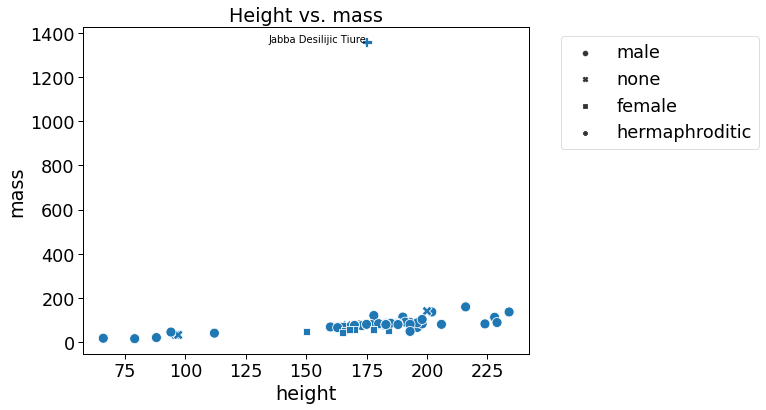

In [26]:
# Scatter plot of height vs. mass
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='height', y='mass', style='sex', s = 100) # s = size of point

plt.title('Height vs. mass')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move legend

     
# Annotate points with mass above 1000
for index, row in df.iterrows():
    if row['mass'] > 1000:
        plt.text(row['height'], row['mass'], row['name'], horizontalalignment='right')


        
plt.show()


Compare height vs. mass in humans. Make shape of point reflect sex and color reflect homeworld

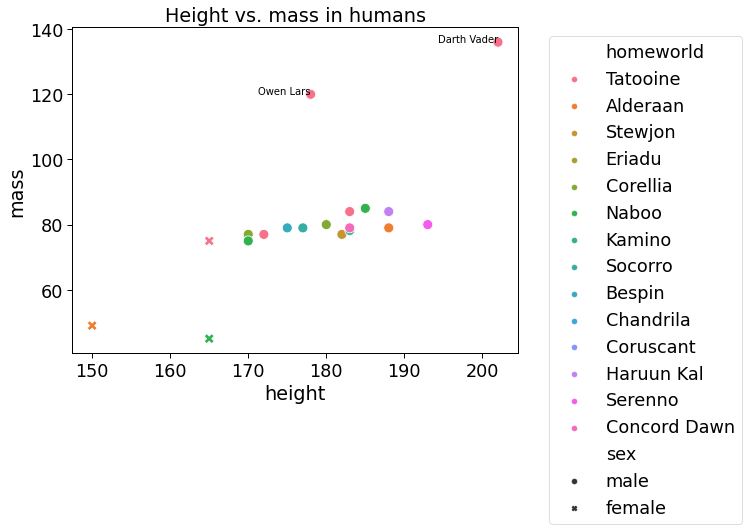

In [27]:
plt.figure(figsize=(8, 6))
df_human = df[df['species'] == 'Human']
sns.scatterplot(data=df_human, x='height', y='mass', hue='homeworld', style='sex', s = 100)
plt.title('Height vs. mass in humans')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move legend

# Annotate points with mass above 1000
for index, row in df_human.iterrows():
    if row['mass'] > 100:
        plt.text(row['height'], row['mass'], row['name'], horizontalalignment='right')
        
plt.show()


## 1.3 Box plots

We can also look at **distributions** of data within our dataset. Here, we'll visualize the mass distributions of each character in our dataset separated by sex using [`seaborn.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

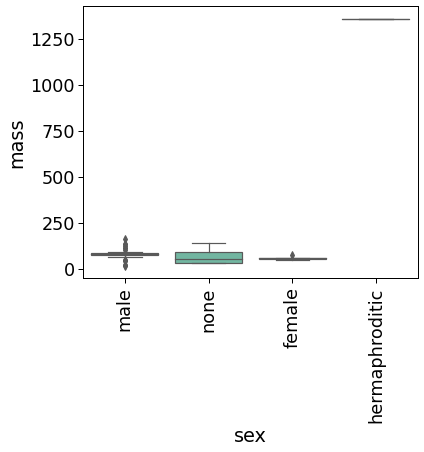

In [28]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='sex', y='mass', palette=c_dict)
plt.xticks(rotation=90)
plt.show()


Since the "hermaphroditic" Jabba the Hutt weighs half a ton, it's difficult to visualize the distrubutions and summary statistics from the box plots for the other categories above. To solve this, we could plot the y variables using a log scale with Matplotlib's [`yscale`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html).



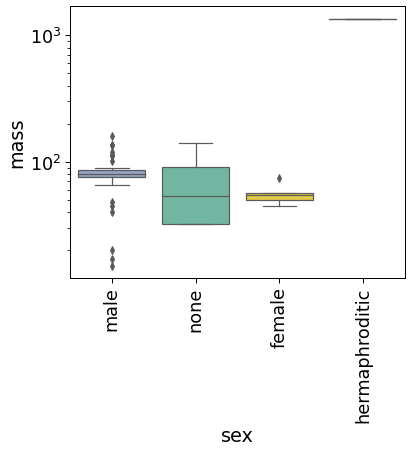

In [29]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=df, x='sex', y='mass', palette=c_dict)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()


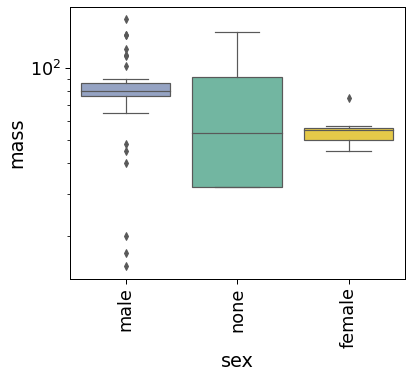

In [30]:
temp = df[df['sex'] != 'hermaphroditic'] # exclusion using !=

plt.figure(figsize=(6, 5))
sns.boxplot(data=temp, x='sex', y='mass', palette=c_dict)
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()


## 1.4 Violin plots

We can also use a violin plot to visualize the distributions of mass per category with [`seaborn.violinplot`](https://seaborn.pydata.org/generated/seaborn.violinplot.html). Violin plots are freuqently used in genomics.


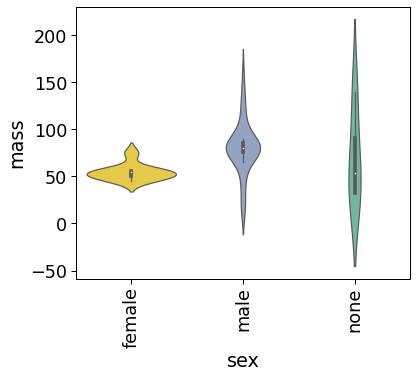

In [31]:
plt.figure(figsize=(6, 5))
sns.violinplot(data=temp, x='sex', y='mass', palette=c_dict,
                    order=['female', 'male', 'none']) # also set custom order
plt.xticks(rotation=90)
plt.show()


# Section 2: Visualizing an RNA-seq dataset

We have data from 2 patient-derived muscle cell lines, Control and FSHD2, that were differentiated in culture over 5 days as described in [this paper](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1008754). 

This dataframe is a gene expression matrix with genes in rows (both gene names and gene IDs are included) and samples in columns.

In [32]:
df = pd.read_csv('data/tpm_matrix.csv')

In [33]:
df.head()

,gene_name,gene_id,Control-1 Day 3 Rep 1,Control-1 Day 3 Rep 2,Control-1 Day 5 Rep 1,Control-1 Day 5 Rep 2,FSHD2-1 Day 3 Rep 1,FSHD2-1 Day 3 Rep 2,FSHD2-1 Day 5 Rep 1,FSHD2-1 Day 5 Rep 2
0,DDX11L1,ENSG00000223972.5,0.199543,0.0000,0.275608,0.079013,1.216350,0.00000,0.00000,0.954882
1,WASH7P,ENSG00000227232.5,1.628010,1.2081,1.912200,1.367780,0.944094,0.19531,1.24893,0.471472
2,MIR6859-1,ENSG00000278267.1,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
3,MIR1302-2HG,ENSG00000243485.5,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
4,MIR1302-2,ENSG00000284332.1,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000


In [34]:
df[df['gene_name'] == 'DYSF'] # check expression of your favorite gene


,gene_name,gene_id,Control-1 Day 3 Rep 1,Control-1 Day 3 Rep 2,Control-1 Day 5 Rep 1,Control-1 Day 5 Rep 2,FSHD2-1 Day 3 Rep 1,FSHD2-1 Day 3 Rep 2,FSHD2-1 Day 5 Rep 1,FSHD2-1 Day 5 Rep 2
6497,DYSF,ENSG00000135636.14,69.586599,84.269742,58.763503,66.679385,73.513979,63.04584,60.118059,56.930005


## 2.1: Heatmap
Using seaborn's [`clustermap`](https://seaborn.pydata.org/generated/seaborn.clustermap.html), which also performs **hierarchical clustering**.


In [35]:
hmap_df = df[df['gene_name'].isin(['DYSF', 'MYH3','MKI67','LEUTX'])]
hmap_df

,gene_name,gene_id,Control-1 Day 3 Rep 1,Control-1 Day 3 Rep 2,Control-1 Day 5 Rep 1,Control-1 Day 5 Rep 2,FSHD2-1 Day 3 Rep 1,FSHD2-1 Day 3 Rep 2,FSHD2-1 Day 5 Rep 1,FSHD2-1 Day 5 Rep 2
6497,DYSF,ENSG00000135636.14,69.586599,84.269742,58.763503,66.679385,73.513979,63.045840,60.118059,56.930005
36142,MKI67,ENSG00000148773.14,2.047889,2.422417,0.529471,1.319605,2.802558,3.343077,1.913701,1.210585
47940,MYH3,ENSG00000109063.15,1008.518919,980.808380,1551.287750,1728.449890,1602.584230,1729.492200,2358.800630,2080.075260
54827,LEUTX,ENSG00000213921.7,0.000000,0.000000,0.000000,0.000000,17.240900,17.024000,93.181300,103.379000


In [36]:
hmap_df.index = hmap_df['gene_name'] # set index (rownames) to be gene name
hmap_df.drop(["gene_id", "gene_name"], axis=1, inplace=True) # drop non-sample columns


/tmp/ipykernel_1993036/3875967488.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hmap_df.drop(["gene_id", "gene_name"], axis=1, inplace=True) # drop non-sample columns


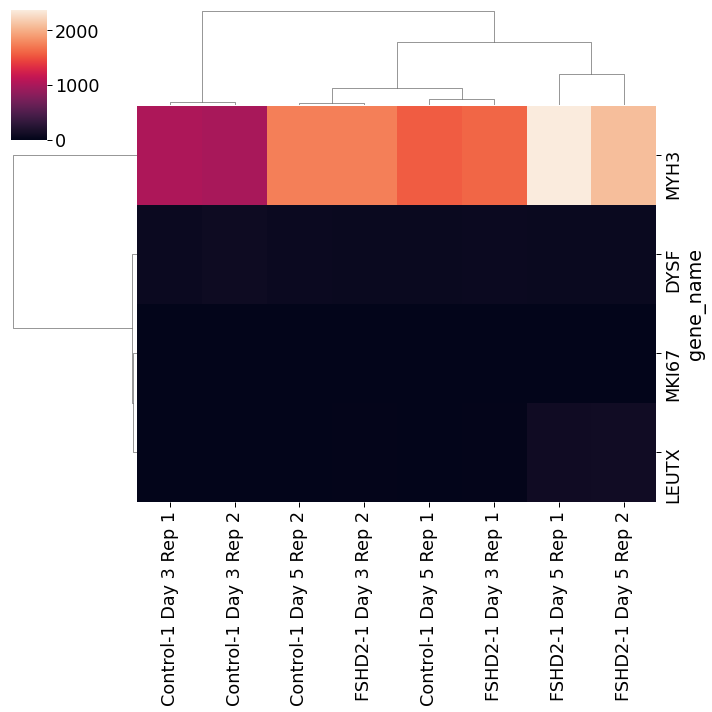

In [37]:
sns.clustermap(data=hmap_df)
plt.show()


The data in the above plot is not row-normalized, meaning that the scale is showing absolute gene expression. MYH3 is clearly the highest expressed out of the 4 example genes, driving the color scale and masking trends across samples.

Let's try row-normalization:

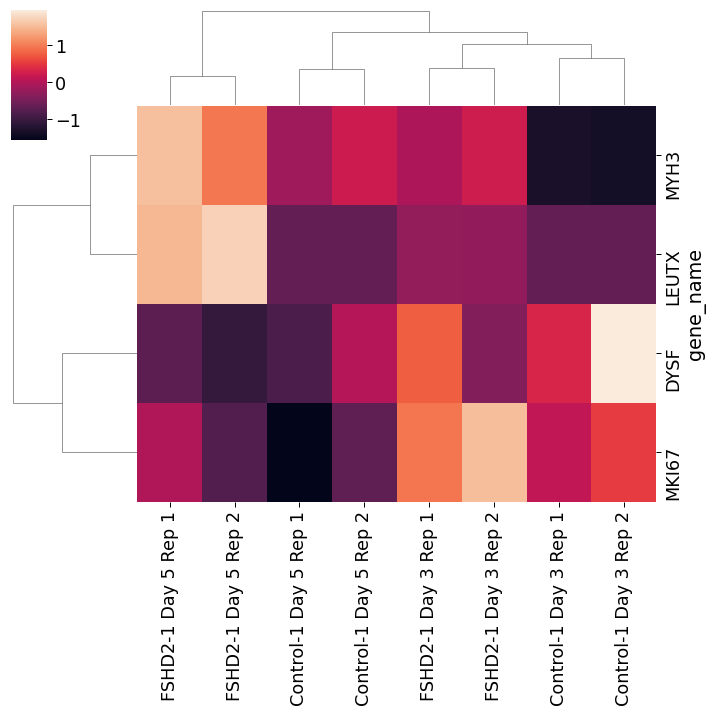

In [38]:
sns.clustermap(data=hmap_df, z_score = 0) # scale data across either 0 (rows) or 1 (columns)
plt.show()


Now the expression patterns of the other genes are much clearer. Note the change to the scale bar.

 Which pairs of genes were **clustered** together?

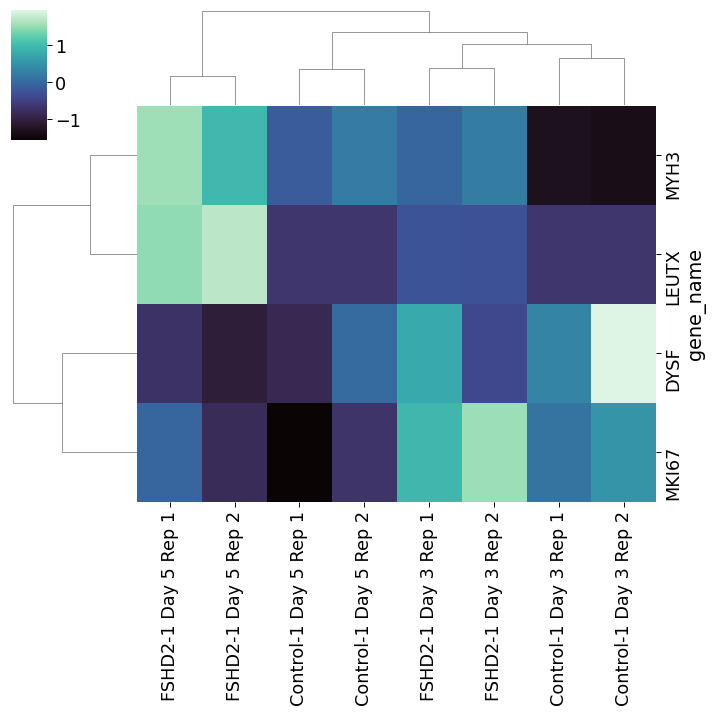

In [39]:
sns.clustermap(data=hmap_df, z_score = 0, cmap="mako") # change color palette. 
plt.show()


Other continuous palettes [here](https://seaborn.pydata.org/tutorial/color_palettes.html#perceptually-uniform-palettes)

## 2.2: Box plots and violin plots for a single gene

We need to modify the dataframe to group by some category, such as disease status or age. Use [`pandas.melt`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) to reshape data.

In [40]:
new_df = df[df['gene_name'] == 'DYSF'] # check expression of your favorite gene


In [41]:
new_df = new_df.melt(id_vars=['gene_name', 'gene_id'], 
                    var_name='Sample', 
                    value_name='Expression')

In [42]:
new_df


,gene_name,gene_id,Sample,Expression
0,DYSF,ENSG00000135636.14,Control-1 Day 3 Rep 1,69.586599
1,DYSF,ENSG00000135636.14,Control-1 Day 3 Rep 2,84.269742
2,DYSF,ENSG00000135636.14,Control-1 Day 5 Rep 1,58.763503
3,DYSF,ENSG00000135636.14,Control-1 Day 5 Rep 2,66.679385
4,DYSF,ENSG00000135636.14,FSHD2-1 Day 3 Rep 1,73.513979
5,DYSF,ENSG00000135636.14,FSHD2-1 Day 3 Rep 2,63.045840
6,DYSF,ENSG00000135636.14,FSHD2-1 Day 5 Rep 1,60.118059
7,DYSF,ENSG00000135636.14,FSHD2-1 Day 5 Rep 2,56.930005


Add metadata by string splitting sample column by space and selecting the first resulting column 

In [43]:
new_df['Condition'] = new_df['Sample'].str.split(' ', expand=True)[0]


In [44]:
new_df

,gene_name,gene_id,Sample,Expression,Condition
0,DYSF,ENSG00000135636.14,Control-1 Day 3 Rep 1,69.586599,Control-1
1,DYSF,ENSG00000135636.14,Control-1 Day 3 Rep 2,84.269742,Control-1
2,DYSF,ENSG00000135636.14,Control-1 Day 5 Rep 1,58.763503,Control-1
3,DYSF,ENSG00000135636.14,Control-1 Day 5 Rep 2,66.679385,Control-1
4,DYSF,ENSG00000135636.14,FSHD2-1 Day 3 Rep 1,73.513979,FSHD2-1
5,DYSF,ENSG00000135636.14,FSHD2-1 Day 3 Rep 2,63.045840,FSHD2-1
6,DYSF,ENSG00000135636.14,FSHD2-1 Day 5 Rep 1,60.118059,FSHD2-1
7,DYSF,ENSG00000135636.14,FSHD2-1 Day 5 Rep 2,56.930005,FSHD2-1


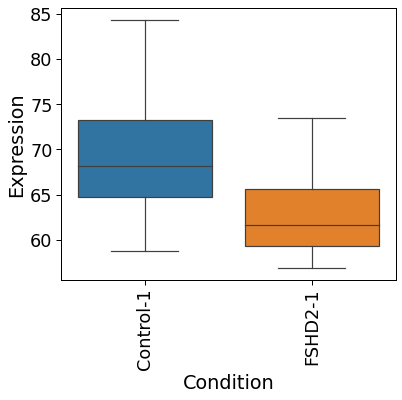

In [45]:
plt.figure(figsize=(6, 5))
sns.boxplot(data=new_df, x='Condition', y='Expression')
plt.xticks(rotation=90)
plt.show()


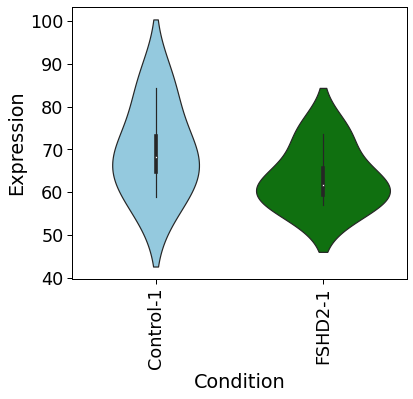

In [46]:
plt.figure(figsize=(6, 5))
sns.violinplot(data=new_df, x='Condition', y='Expression', palette=['skyblue', 'green']) # can also just set colors without a dictionary
plt.xticks(rotation=90)
plt.show()


## 2.3: Volcano plot using differential gene expression analysis results

In [47]:
df = pd.read_csv('data/control_day3_vs_day5_deg_results.csv')

In [48]:
df.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog10padj,gene_id,gene_name
0,2.081473,-0.910079,1.891332,-0.481184,0.630386,NaN,NaN,ENSG00000223972.5,DDX11L1
1,20.101890,-0.290715,0.582639,-0.498963,0.617806,0.774913,0.110747,ENSG00000227232.5,WASH7P
2,38.429230,-0.227524,0.418646,-0.543476,0.586802,0.750883,0.124428,ENSG00000233750.3,CICP27
3,0.970093,-0.290027,3.173542,-0.091389,0.927184,NaN,NaN,ENSG00000268903.1,AL627309.6
4,0.268263,-1.667682,5.343856,-0.312075,0.754984,NaN,NaN,ENSG00000269981.1,AL627309.7


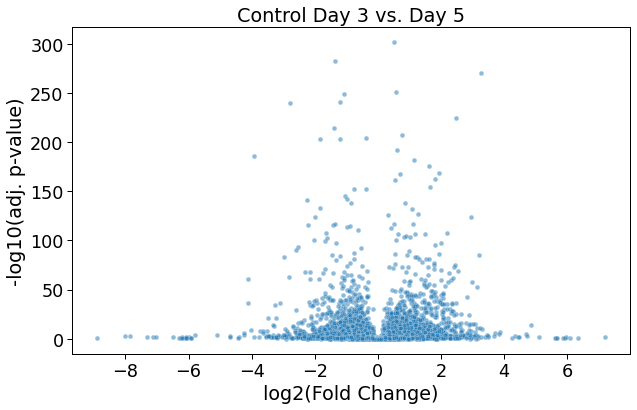

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log2FoldChange', y='nlog10padj', alpha=0.5) # alpha is like point opacity
plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(adj. p-value)')
plt.title('Control Day 3 vs. Day 5')
plt.show()



Let's highlight the significantly upregulated and downregulated genes using |log2(fold change)| > 1 and adj. p-value < 0.05.

In [50]:
degs_up = df[(df['padj'] < 0.05) & (df['log2FoldChange'] > 1)]

In [51]:
len(degs_up) # 603 upregulated genes with these thresholds

603

In [52]:
degs_down = df[(df['padj'] < 0.05) & (df['log2FoldChange'] < -1)]

In [53]:
len(degs_down) # 519 downregulated genes with these thresholds

519

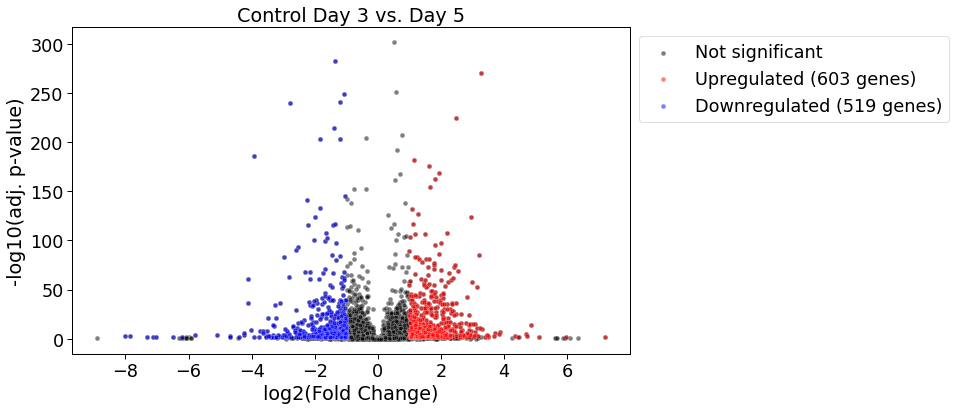

In [54]:
degs_up = df[(df['padj'] < 0.05) & (df['log2FoldChange'] > 1)]
degs_down = df[(df['padj'] < 0.05) & (df['log2FoldChange'] < -1)]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='black', label = "Not significant")

# basically layer the subset dataframes on top of the original plot
sns.scatterplot(data=degs_up, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='red', label = f"Upregulated ({len(degs_up)} genes)")
sns.scatterplot(data=degs_down, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='blue', label = f"Downregulated ({len(degs_down)} genes)")

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(adj. p-value)')
plt.title('Control Day 3 vs. Day 5')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # move legend

plt.show()



Finally, we can also draw some dashed lines to show the cutoffs we used.

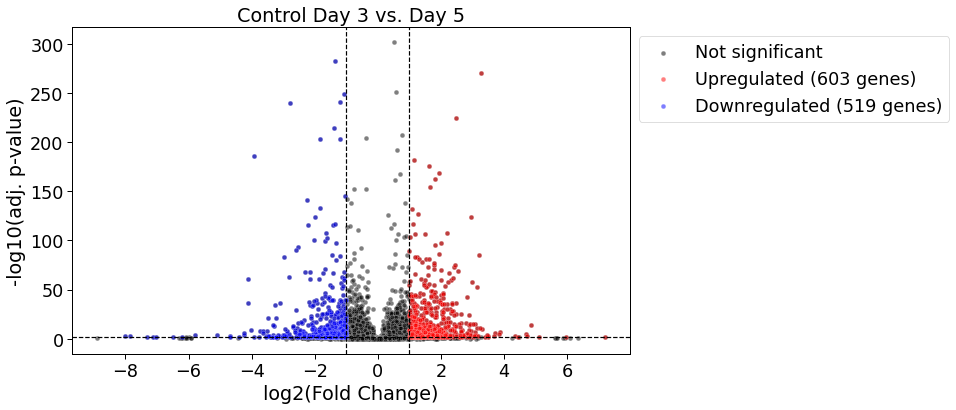

In [55]:
degs_up = df[(df['padj'] < 0.05) & (df['log2FoldChange'] > 1)]
degs_down = df[(df['padj'] < 0.05) & (df['log2FoldChange'] < -1)]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='black', label = "Not significant")

# basically layer the subset dataframes on top of the original plot
sns.scatterplot(data=degs_up, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='red', label = f"Upregulated ({len(degs_up)} genes)")
sns.scatterplot(data=degs_down, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='blue', label = f"Downregulated ({len(degs_down)} genes)")

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(adj. p-value)')
plt.title('Control Day 3 vs. Day 5')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # move legend

# draw horizontal and vertical dashed lines
plt.axhline(1.3, color='black', linestyle='--')
plt.axvline(1, color='black', linestyle='--')
plt.axvline(-1, color='black', linestyle='--')

plt.show()


We can also label the points with really low p-values and high log2(fold change)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


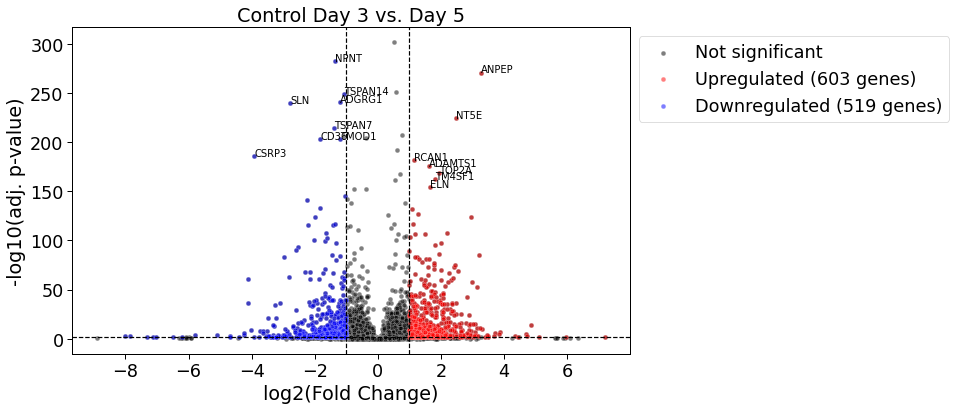

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='black', label = "Not significant")

# basically layer the subset dataframes on top of the original plot
sns.scatterplot(data=degs_up, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='red', label = f"Upregulated ({len(degs_up)} genes)")
sns.scatterplot(data=degs_down, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='blue', label = f"Downregulated ({len(degs_down)} genes)")

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(adj. p-value)')
plt.title('Control Day 3 vs. Day 5')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # move legend

# draw horizontal and vertical dashed lines
plt.axhline(1.3, color='black', linestyle='--')
plt.axvline(1, color='black', linestyle='--')
plt.axvline(-1, color='black', linestyle='--')

# label specific points
for index, row in df.iterrows():
    if abs(row['log2FoldChange']) > 1 and row['nlog10padj'] > 150:
        plt.text(row['log2FoldChange'], row['nlog10padj'], row['gene_name'], fontsize=10)


plt.show()


Finally, we can also swap the fold change so that when we're talking about "upregulated" we mean in **day 5 compared to day 3**. (The analysis tool chooses order automatically but we can choose how to display it)



posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


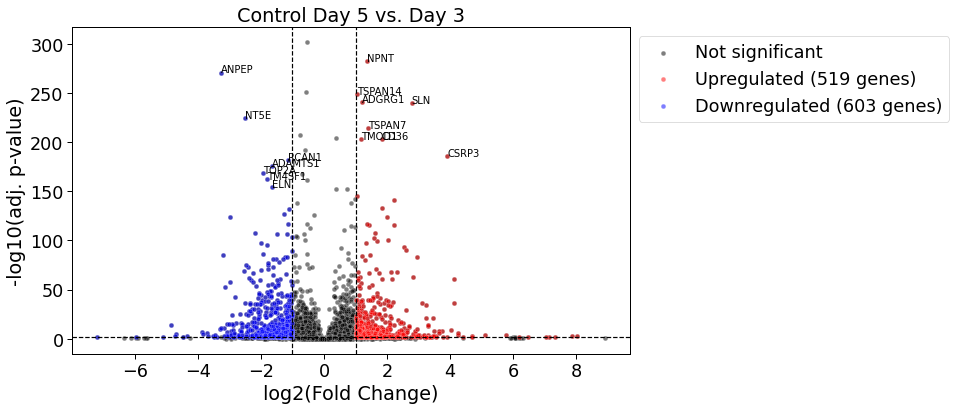

In [57]:
df_swap = df
df_swap['log2FoldChange'] = -df_swap['log2FoldChange']

degs_up = df_swap[(df_swap['padj'] < 0.05) & (df_swap['log2FoldChange'] > 1)]
degs_down = df_swap[(df_swap['padj'] < 0.05) & (df_swap['log2FoldChange'] < -1)]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='black', label = "Not significant")

# basically layer the subset dataframes on top of the original plot
sns.scatterplot(data=degs_up, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='red', label = f"Upregulated ({len(degs_up)} genes)")
sns.scatterplot(data=degs_down, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='blue', label = f"Downregulated ({len(degs_down)} genes)")

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(adj. p-value)')
plt.title('Control Day 5 vs. Day 3')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # move legend

# draw horizontal and vertical dashed lines
plt.axhline(1.3, color='black', linestyle='--')
plt.axvline(1, color='black', linestyle='--')
plt.axvline(-1, color='black', linestyle='--')

# label specific points
for index, row in df_swap.iterrows():
    if abs(row['log2FoldChange']) > 1 and row['nlog10padj'] > 150:
        plt.text(row['log2FoldChange'], row['nlog10padj'], row['gene_name'], fontsize=10)


plt.show()


Could you make a similar plot given a different results dataframe? For example, here's day 3 vs. day 5 in FSHD samples:

In [58]:
df = pd.read_csv('data/fshd_day3_vs_day5_deg_results.csv')

In [59]:
df.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog10padj,gene_id,gene_name
0,10.156897,0.340953,4.585013,0.074362,0.940722,0.977074,0.010072,ENSG00000223972.5,DDX11L1
1,10.634580,-0.631924,0.940876,-0.671634,0.501817,0.735026,0.133697,ENSG00000227232.5,WASH7P
2,34.835445,-0.131750,0.464653,-0.283546,0.776758,0.905895,0.042922,ENSG00000233750.3,CICP27
3,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000268903.1,AL627309.6
4,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,ENSG00000269981.1,AL627309.7


posx and posy should be finite values
posx and posy should be finite values


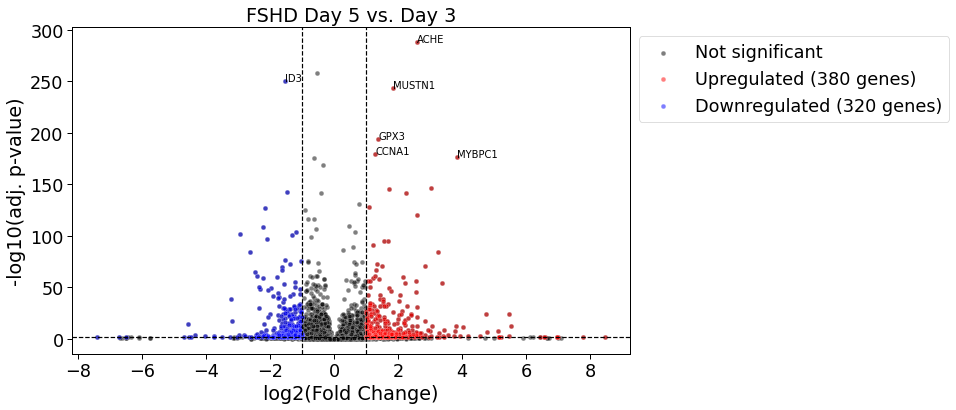

In [60]:
df_swap = df
df_swap['log2FoldChange'] = -df_swap['log2FoldChange']

degs_up = df_swap[(df_swap['padj'] < 0.05) & (df_swap['log2FoldChange'] > 1)]
degs_down = df_swap[(df_swap['padj'] < 0.05) & (df_swap['log2FoldChange'] < -1)]


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_swap, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='black', label = "Not significant")

# basically layer the subset dataframes on top of the original plot
sns.scatterplot(data=degs_up, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='red', label = f"Upregulated ({len(degs_up)} genes)")
sns.scatterplot(data=degs_down, x='log2FoldChange', y='nlog10padj', alpha=0.5, 
                color='blue', label = f"Downregulated ({len(degs_down)} genes)")

plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(adj. p-value)')
plt.title('FSHD Day 5 vs. Day 3')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left') # move legend

# draw horizontal and vertical dashed lines
plt.axhline(1.3, color='black', linestyle='--')
plt.axvline(1, color='black', linestyle='--')
plt.axvline(-1, color='black', linestyle='--')

# label specific points
for index, row in df_swap.iterrows():
    if abs(row['log2FoldChange']) > 1 and row['nlog10padj'] > 150:
        plt.text(row['log2FoldChange'], row['nlog10padj'], row['gene_name'], fontsize=10)


plt.show()


## 2.4: DEG heatmap
Let's use the differential gene expression analysis results to choose the top DEGs to show on a heatmap.

In [61]:
df = pd.read_csv('data/control_day3_vs_day5_deg_results.csv')

In [62]:
degs = df[(df['padj'] < 0.05) & (abs(df['log2FoldChange']) > 2)]

In [63]:
len(degs)

287

In [64]:
degs.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,nlog10padj,gene_id,gene_name
29,11.775760,-2.229050,0.537661,-4.145831,3.385835e-05,2.059019e-04,3.686340,ENSG00000188290.10,HES4
195,38.254353,3.086054,0.542318,5.690483,1.266805e-08,1.269954e-07,6.896212,ENSG00000028137.19,TNFRSF1B
417,90.062730,-2.060386,0.232561,-8.859557,8.033314e-19,1.959859e-17,16.707775,ENSG00000158022.6,TRIM63
422,7.621835,-2.872906,0.776915,-3.697840,2.174420e-04,1.142791e-03,2.942033,ENSG00000142675.18,CNKSR1
585,174.791030,2.001247,0.139365,14.359741,9.257246e-47,7.263686e-45,44.138843,ENSG00000092853.14,CLSPN


In [65]:
tpm_df = pd.read_csv('data/tpm_matrix.csv')


In [66]:
tpm_df.head()

,gene_name,gene_id,Control-1 Day 3 Rep 1,Control-1 Day 3 Rep 2,Control-1 Day 5 Rep 1,Control-1 Day 5 Rep 2,FSHD2-1 Day 3 Rep 1,FSHD2-1 Day 3 Rep 2,FSHD2-1 Day 5 Rep 1,FSHD2-1 Day 5 Rep 2
0,DDX11L1,ENSG00000223972.5,0.199543,0.0000,0.275608,0.079013,1.216350,0.00000,0.00000,0.954882
1,WASH7P,ENSG00000227232.5,1.628010,1.2081,1.912200,1.367780,0.944094,0.19531,1.24893,0.471472
2,MIR6859-1,ENSG00000278267.1,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
3,MIR1302-2HG,ENSG00000243485.5,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000
4,MIR1302-2,ENSG00000284332.1,0.000000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000


In [67]:
hmap_df = tpm_df[tpm_df['gene_name'].isin(degs['gene_name'])].copy()
hmap_df.index = hmap_df['gene_name'] # set index (rownames) to be gene name
hmap_df.drop(["gene_id", "gene_name"], axis=1, inplace=True) # drop non-sample columns


In [68]:
len(hmap_df)

287

In [69]:
hmap_df.head()

,Control-1 Day 3 Rep 1,Control-1 Day 3 Rep 2,Control-1 Day 5 Rep 1,Control-1 Day 5 Rep 2,FSHD2-1 Day 3 Rep 1,FSHD2-1 Day 3 Rep 2,FSHD2-1 Day 5 Rep 1,FSHD2-1 Day 5 Rep 2
gene_name,,,,,,,,
HES4,0.574632,0.438217,1.839992,2.428063,1.081784,1.270001,1.689780,3.516990
TNFRSF1B,1.383474,2.317480,0.228254,0.200843,1.824170,0.703997,0.645263,0.277383
TRIM63,1.730640,2.267040,8.600370,7.121520,4.109230,3.683570,9.975079,9.838400
CNKSR1,0.259352,0.170011,0.854370,1.623918,0.511639,0.532498,1.072371,1.143014
CLSPN,3.778457,4.658470,0.975880,1.023895,3.018561,2.943208,1.379823,0.933366


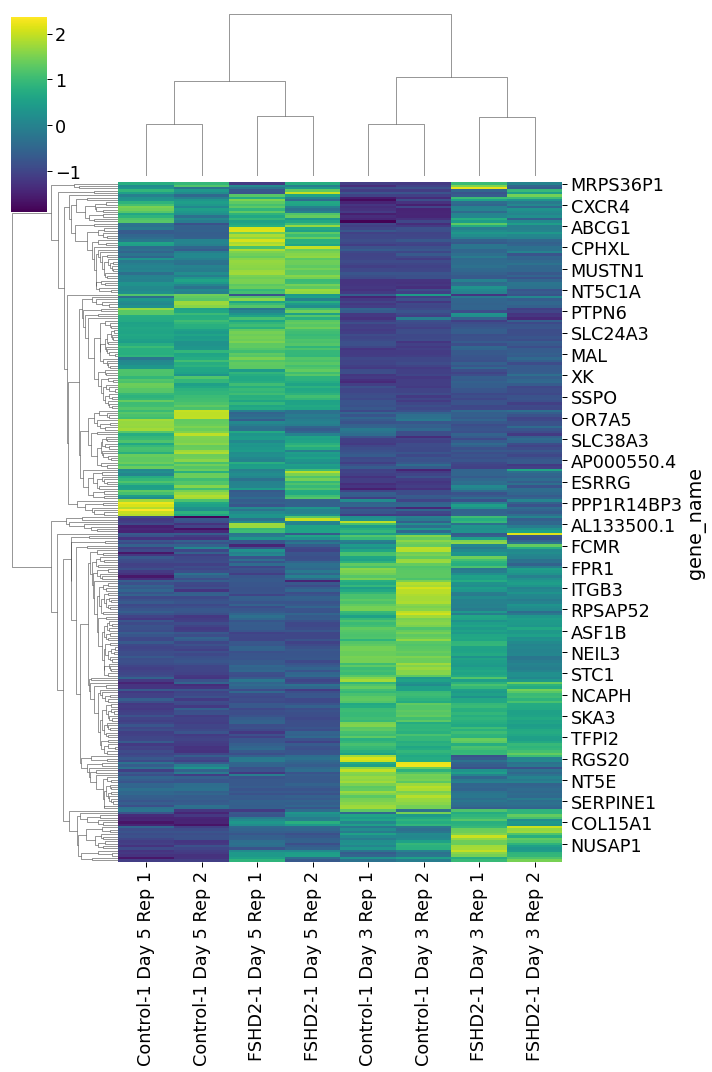

In [70]:
sns.clustermap(data=hmap_df, z_score = 0, cmap="viridis", figsize=(10, 15))
plt.show()


Be aware that clustermap will show **some** rownames even when the data is too big to show all of them! To turn off row names, we can set the plot to a variable and modify it with matplotlib:

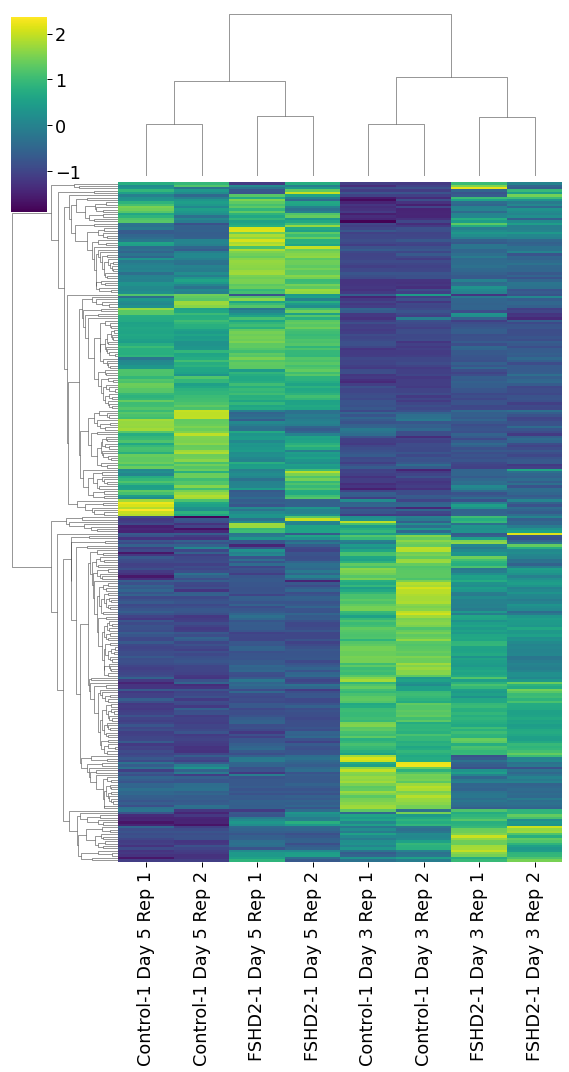

In [71]:
cmap = sns.clustermap(data=hmap_df, z_score = 0, cmap="viridis", figsize=(10, 15))

cmap.ax_heatmap.set_yticklabels([])
cmap.ax_heatmap.yaxis.set_ticks([])
cmap.ax_heatmap.set_ylabel('')

plt.show()

## 2.5: Plotting a PCA scatter plot
Read in the results from running PCA on the FSHD bulk RNA-seq data. Each sample has numeric coordinates in 8 PCs; we will make a scatter plot of PC1 vs. PC2.

In [72]:
df = pd.read_csv('data/pca_results.csv')

In [73]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,day_of_differentiation,fshd_status,Sample,Individual
0,6947.120117,2914.772955,2933.697604,-3010.679085,-342.832219,1143.102617,-408.828212,-1.433875e-11,Day 3,Control,Control-1 Day 3 Rep 1,Control-1
1,13638.782562,378.496298,-3670.111223,-843.754259,-101.133940,-978.420201,358.912401,-3.672085e-11,Day 3,Control,Control-1 Day 3 Rep 2,Control-1
2,-4962.785673,5964.685235,-528.201277,1724.313824,-1828.731670,397.311846,1114.963929,1.222134e-11,Day 5,Control,Control-1 Day 5 Rep 1,Control-1
3,-3909.663918,6137.266396,-68.748568,1380.285033,2270.645444,-540.138481,-985.548773,-9.663381e-12,Day 5,Control,Control-1 Day 5 Rep 2,Control-1
4,5533.850902,-5287.711189,-236.023827,3776.058975,-200.657217,836.914942,-449.286046,8.583356e-12,Day 3,FSHD2,FSHD2-1 Day 3 Rep 1,FSHD2-1


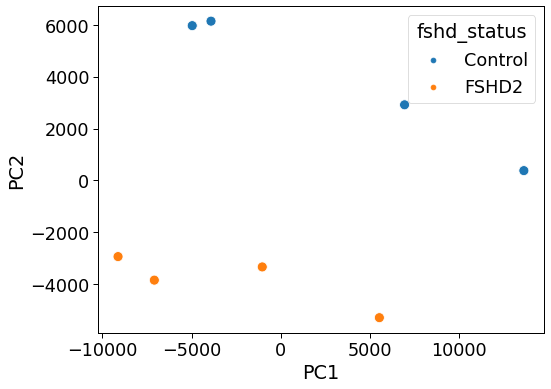

In [74]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue = 'fshd_status', s = 100) # s = size of point
plt.show()


Can you try setting the point shape to be day of differentiation to make this plot?

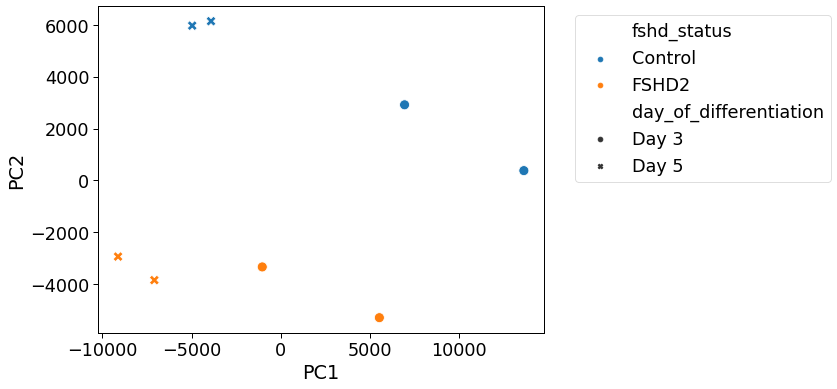

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue = 'fshd_status', style = 'day_of_differentiation', s = 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # move legend
plt.show()


Is differentiation day captured by PC1 or PC2? How about disease status?

What is missing from the PCA plot? (We'll revisit it next week to fix it!)

## 2.6: Venn diagram of DEGs

For example, let's compare the genes that are upregulated in differentiated day 5 cells (downregulated in day 3) in both control and FSHD samples.

In [76]:
#! pip install matplotlib_venn # uncomment and run this command( with the exclamation point), then restart kernel to implement change...will ask HPC to download this package

In [77]:
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib_venn import venn2


In [78]:
df_ctrl = pd.read_csv('data/control_day3_vs_day5_deg_results.csv')
df_fshd = pd.read_csv('data/fshd_day3_vs_day5_deg_results.csv')


In [79]:
sig_ctrl = df_ctrl[(df_ctrl['padj'] < 0.05) & (df_ctrl['log2FoldChange'] < -1)]
sig_fshd = df_fshd[(df_fshd['padj'] < 0.05) & (df_fshd['log2FoldChange'] < -1)]

genes_ctrl = set(sig_ctrl['gene_name'])
genes_fshd = set(sig_fshd['gene_name'])


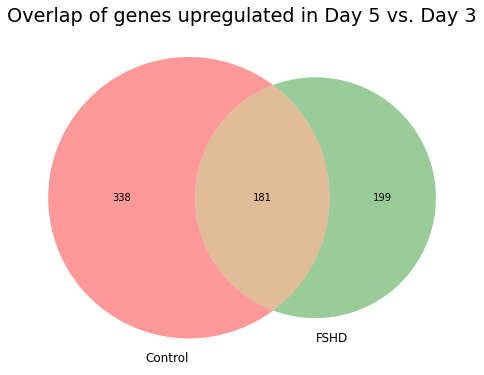

In [80]:
plt.figure(figsize=(8, 8))
venn2([genes_ctrl, genes_fshd], ('Control', 'FSHD'))

plt.title('Overlap of genes upregulated in Day 5 vs. Day 3')
plt.show()